# Comparison of performance between graph on prediction task

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import join
from sklearn.metrics import accuracy_score

In [24]:
mypath = "results/prediction_pipeline_losses5"
graph_name_list = ["stringdb", "hetio", "funcoup", "humannet", "genemania", "regnet", "none"]
n_folds = 5
test_pred_dict = {}
train_loss_dict = {}
test_loss_dict = {}

dict_list = [train_loss_dict, test_loss_dict, test_pred_dict]
filetype_list = ["train_loss_list_", "test_loss_list_", "test_pred_list_"]

## Load data

In [25]:
for graph_name in graph_name_list:
    for dict, filetype in zip(dict_list, filetype_list):
        L = []
        for fold in range(1, n_folds+1):
            L.append(np.load(join(mypath, filetype + graph_name + "_" + str(fold) +".npy"), allow_pickle=True))
        dict[graph_name] = L

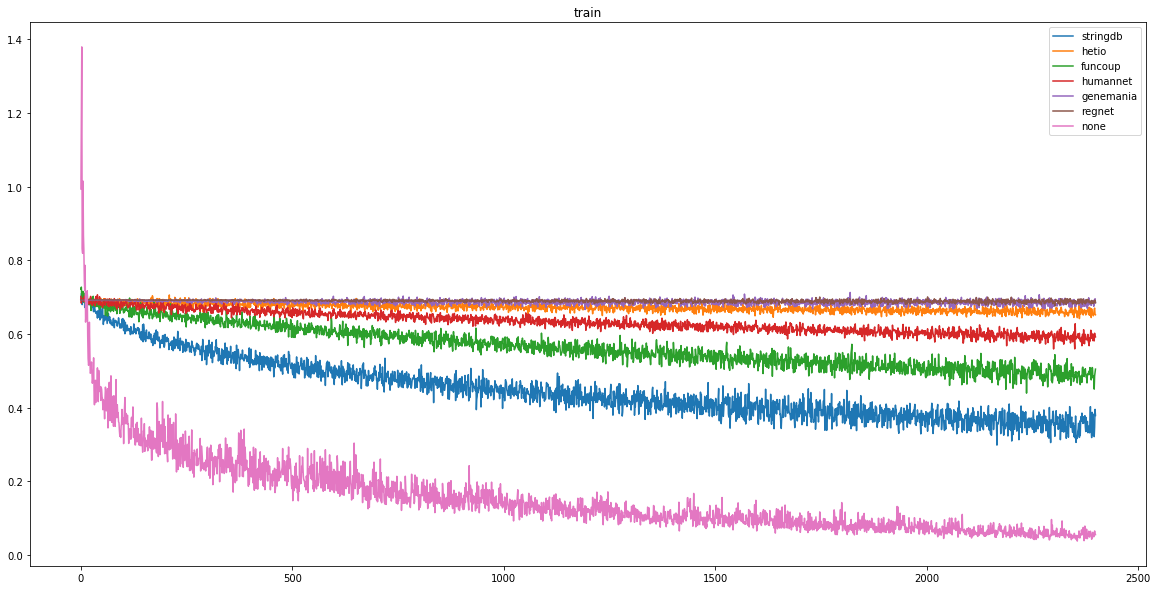

In [26]:
plt.figure(figsize=(20,10))
# plt.ylim(0, 1)
# plt.xlim(-1, 100)
for graph_name in graph_name_list:
    plt.plot(np.mean(train_loss_dict[graph_name], axis=0)[:, 0], 
             np.mean(train_loss_dict[graph_name], axis=0)[:, 1], label=graph_name)
plt.legend()
plt.title("train")
plt.show()

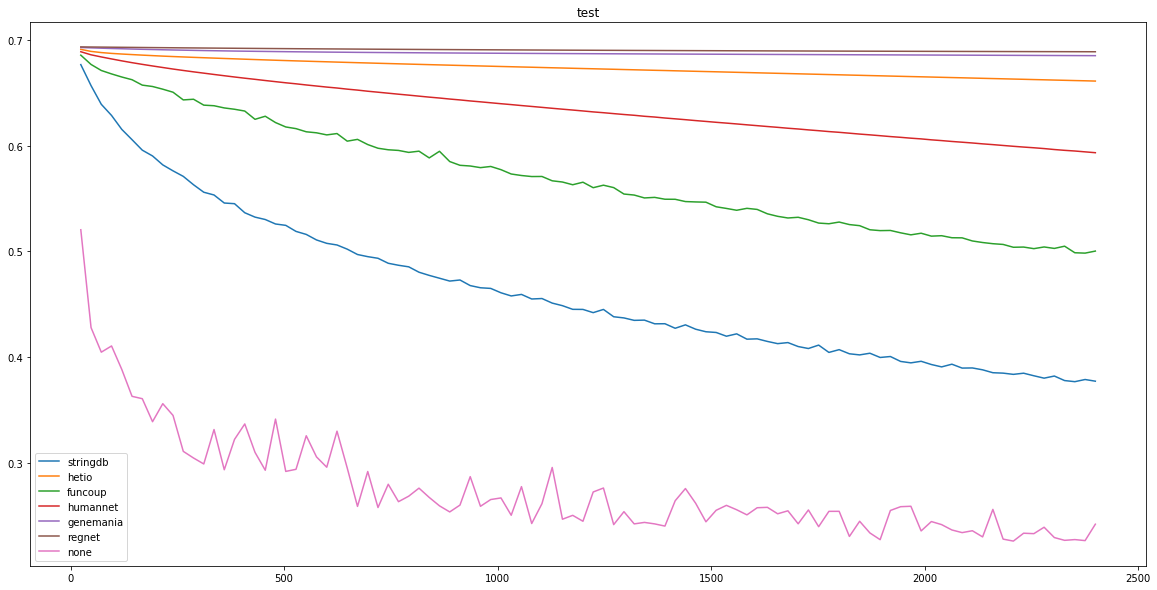

In [27]:
plt.figure(figsize=(20,10))
# plt.ylim(0, 1)
for graph_name in graph_name_list:
    plt.plot(np.mean(test_loss_dict[graph_name], axis=0)[:, 0], 
             np.mean(test_loss_dict[graph_name], axis=0)[:, 1], label=graph_name)
plt.legend()
plt.title("test")
plt.show()

(192, 1)


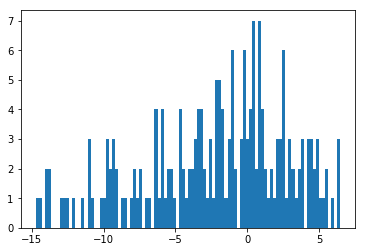

In [28]:
grasph_name = graph_name_list[0]
fold = 0
epoch = -1

output = test_pred_dict[graph_name][fold][epoch][2]
print(output.shape)
plt.hist(output, bins=100)
plt.show()

## Compute accuracy

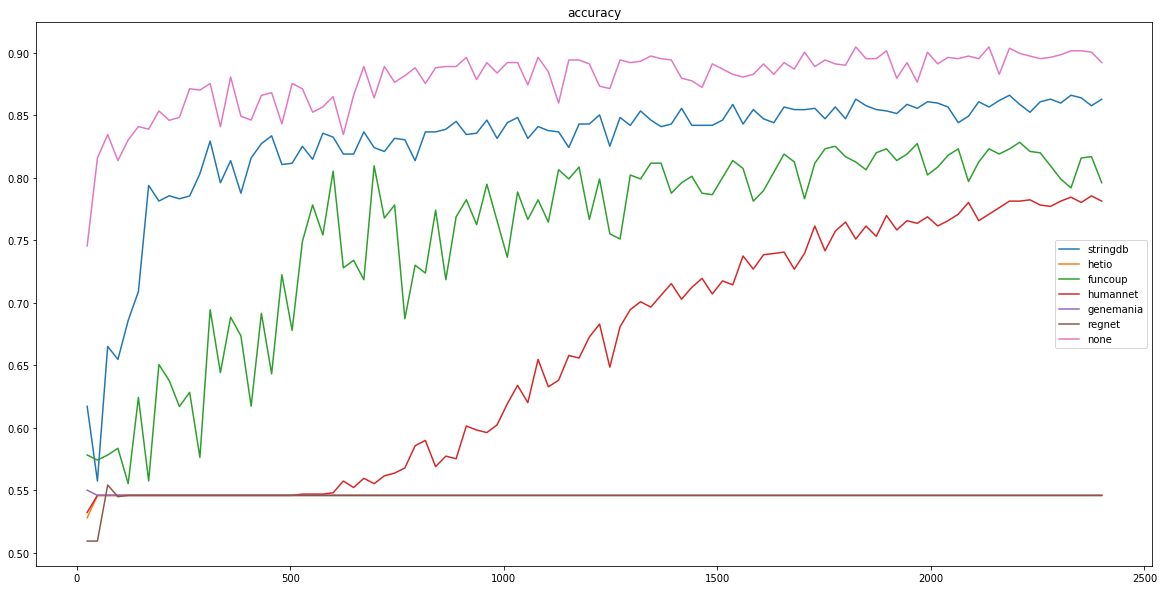

In [33]:
plt.figure(figsize=(20,10))
# fold = 0
n_epochs = len(test_pred_dict[graph_name][fold])
for graph_name in graph_name_list:
    test_acc_list = []
    for fold in range(n_folds):
        test_acc_fold_list = []
        for epoch in range(n_epochs):
            example = test_pred_dict[graph_name][fold][epoch]
            test_acc_fold_list.append((example[0], accuracy_score(example[1], example[2] > 0)))
        test_acc_list.append(test_acc_fold_list)
    test_acc_list = np.mean(test_acc_list, axis=0)
    plt.plot(test_acc_list[:, 0], test_acc_list[:, 1], label=graph_name)
plt.title("accuracy")
plt.legend()
plt.show()